In [1]:
import pickle
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
infos = []
idx_tups = []
for file in glob.glob("../../data/*"):
    infos.append(pickle.load(open(file, 'rb')))
    var = file.split("_")[1:4]
    var[-1] = int(var[-1].split(".")[0])
    var[0] = int(var[0])
    var[1] = float(var[1]) if var[1] != 'False' else False
    # IDX tups follow the format (epsilon, throw out threshold, batch size)
    idx_tups.append(var)

In [3]:
infos[0].keys(), [len(v) for v in infos[0].values() if type(v) == list]

(dict_keys(['train_l', 'test_l', 'adv', 'acc', 'merlin_adv']),
 [20, 20, 20, 20])

In [57]:
inf_scalars = [(i[0]['acc'], i[0]['adv'][-1],  i[0]['merlin_adv'][-1][0], *i[1]) for i in zip(infos, idx_tups)]
ds = pd.DataFrame(inf_scalars)
ds.columns = ['acc', 'yeom', 'merlin', 'epsilon', 'throw out', 'batch_size']

In [69]:
acc_idx = ds.groupby(['epsilon', 'throw out'])['acc'].transform(max) == ds['acc']
yeom_idx = ds.groupby(['epsilon', 'throw out'])['yeom'].transform(min) == ds['yeom']
merlin_idx = ds.groupby(['epsilon', 'throw out'])['merlin'].transform(min) == ds['merlin']
acc_d = ds[acc_idx]
yeom_d = ds[yeom_idx]
merlin_d = ds[merlin_idx]

,acc,yeom,merlin,epsilon,throw out,batch_size
0,0.605622,0.066532,0.071875,50000,10,16
1,0.607669,0.095699,0.134375,0,5,16
2,0.583788,0.050323,0.106250,100000,10,16
3,0.366812,0.026194,0.050000,100000,2,32
4,0.594159,0.074883,0.093750,0,2,16
5,0.539847,0.020368,0.056250,10000,False,16
6,0.578057,0.469157,0.235938,0,False,32
7,0.246998,-0.003541,0.032812,1,5,32
8,0.046261,0.003308,0.128125,0,0.5,16
9,0.591157,0.393923,0.184375,0,50,16


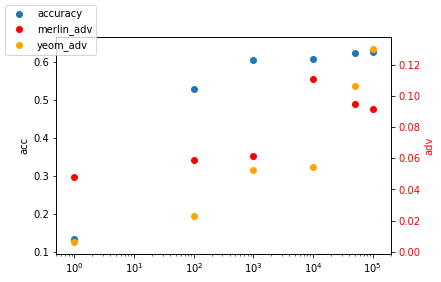

In [75]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
d = acc_d
df = d[(d['throw out'] == False) & (d['epsilon'] > 0)]
ax1.scatter(df['epsilon'], df['acc'] , label="accuracy")
ax1.set_ylabel('acc')
ax1.set_xscale('log')

ax2 = ax1.twinx()
ax2.scatter(df['epsilon'], df['merlin'],c='red', label='merlin_adv')
ax2.scatter(df['epsilon'], df['yeom'],c='orange', label='yeom_adv')
ax2.set_ylabel('adv', color='r')
ax2.set_xscale('log')
fig.legend(loc='upper left')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#ax2.set_title('epsilon=50000')



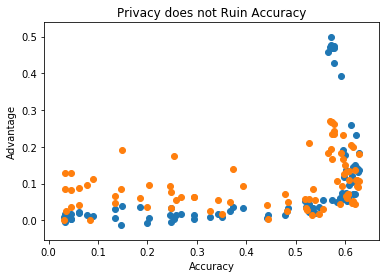

In [26]:
plt.scatter(ds['acc'], ds['yeom'], label='Yeom')
plt.scatter(ds['acc'], ds['merlin'], label='Merlin')
plt.xlabel('Accuracy')
plt.ylabel('Advantage')
plt.title('Privacy does not Ruin Accuracy')
plt.show()